In [1]:
import numpy as np
import sys
# sys.path.pop(2)
sys.path.insert(1,'/home/zhanibek/.local/lib/python2.7/site-packages/cv2')
sys.path.insert(1,'/home/zhanibek/catkin_ws/src/smart_tray/scripts/')
from phri.utils import *
from phri.calibration import Calibrate_Camera
import cv2 
from cv2 import aruco
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tqdm import tqdm_notebook
import pickle
import random
%load_ext autoreload
%autoreload 2

In [2]:
cv2.__version__

'3.3.1-dev'

### Constants

In [3]:
base_dir = '../data/pose_estimation'

In [4]:
im_partial = read_image(os.path.join(base_dir, 'charuco_pose_est', 'im0_partial_view.png'))
im_full = read_image(os.path.join(base_dir, 'charuco_pose_est', 'im0_full_view.png'))

### Charuco Board for Calibration

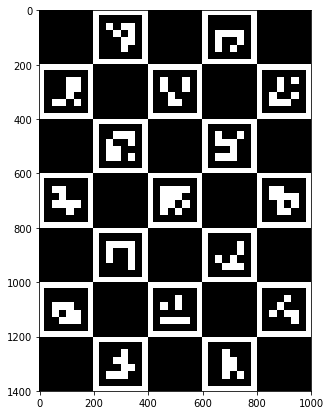

In [5]:
cal_sqlen = 0.03677
cal_mlen = 0.02959
cal_aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
calib_board = aruco.CharucoBoard_create(5, 7, cal_sqlen, cal_mlen, cal_aruco_dict)
calib_imboard = calib_board.draw((1000, 1400))

# cv2.imwrite(os.path.join(base_dir, "charuco_calibration.tiff"), imboard)

fig = plt.figure(figsize=(5,7))
showMarker(calib_imboard)
plt.show()


### Charuco Board for Detection 1

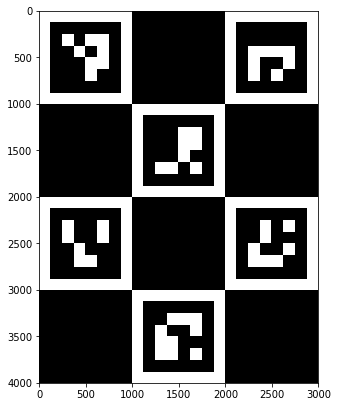

In [6]:
sqLen_1 = 0.0644
mrklen_1 = 0.04865 
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
board1 = aruco.CharucoBoard_create(3, 4, sqLen_1, mrklen_1, aruco_dict)
imboard1 = board1.draw((3000, 4000))

# cv2.imwrite(os.path.join(base_dir, "charuco_detection_1.tiff"), imboard)

fig = plt.figure(figsize=(5,7))
showMarker(imboard1)
plt.show()


### Charuco Board for Detection 2

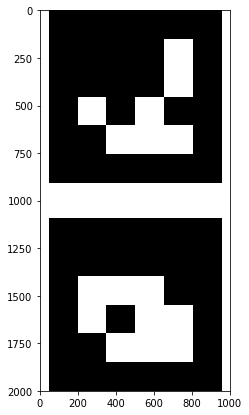

In [7]:
sep2 = 0.02274
mrklen2 = 0.11376 
aruco_dict = aruco.Dictionary_get(aruco.DICT_4X4_50)
board2 = aruco.GridBoard_create(1, 2, mrklen2, sep2, aruco_dict, 11)
# board2.ids = np.array([[11],[15]])
imboard2 = board2.draw((1000, 2000))

# cv2.imwrite(os.path.join(base_dir, "charuco_detection_2.tiff"), imboard)

fig = plt.figure(figsize=(5,7))
showMarker(imboard2)
plt.show()


# Calibrate

#### Read the data

In [8]:
# datadir = "/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/"
datadir = "/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/angetube/images/"
# datadir = "/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/"

In [9]:
images = np.array([datadir + f for f in os.listdir(datadir) if f.endswith(".png") ])
order = np.argsort([int(p.split('/')[-1].split("_")[1].split("_")[0]) for p in images])
images = images[order]
len(images)

370

In [10]:
images

array(['/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_0_10102020104204_466151.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_1_10102020104204_799955.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_2_10102020104205_133231.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_3_10102020104205_466529.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_4_10102020104205_799954.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_5_10102020104206_133219.png',
       '/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_6_10102020104206_466564.png',
       '/home/zhanibek/catk

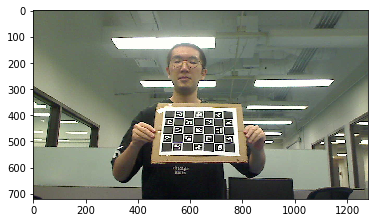

In [11]:
# Show an example of one image
im = read_image(images[258])
plt.figure()
plt.imshow(im)
#ax.axis('off')
plt.show()

In [12]:
# random.shuffle(images)

## Calibrate

In [13]:
calib = Calibrate_Camera(calib_board)
%time cam_cal_data = calib.calibrate(images[:100])


CPU times: user 2min 42s, sys: 223 ms, total: 2min 43s
Wall time: 2min 37s


In [14]:
images[258]

'/home/zhanibek/catkin_ws/src/smart_tray/data/pose_estimation/calibration/logitech_t1/images/logitech_263_10102020104332_133281.png'

#### Save the results

In [15]:
# Save the results
cname = os.path.join(base_dir, 'calibration/logitech_t1/calibration_matrix_logitech_1.pkl')
with open(cname, 'wb') as f:
    pickle.dump(cam_cal_data, f)

In [16]:
cname

'../data/pose_estimation/calibration/logitech_t1/calibration_matrix_logitech_1.pkl'

#### Visualize Calibration

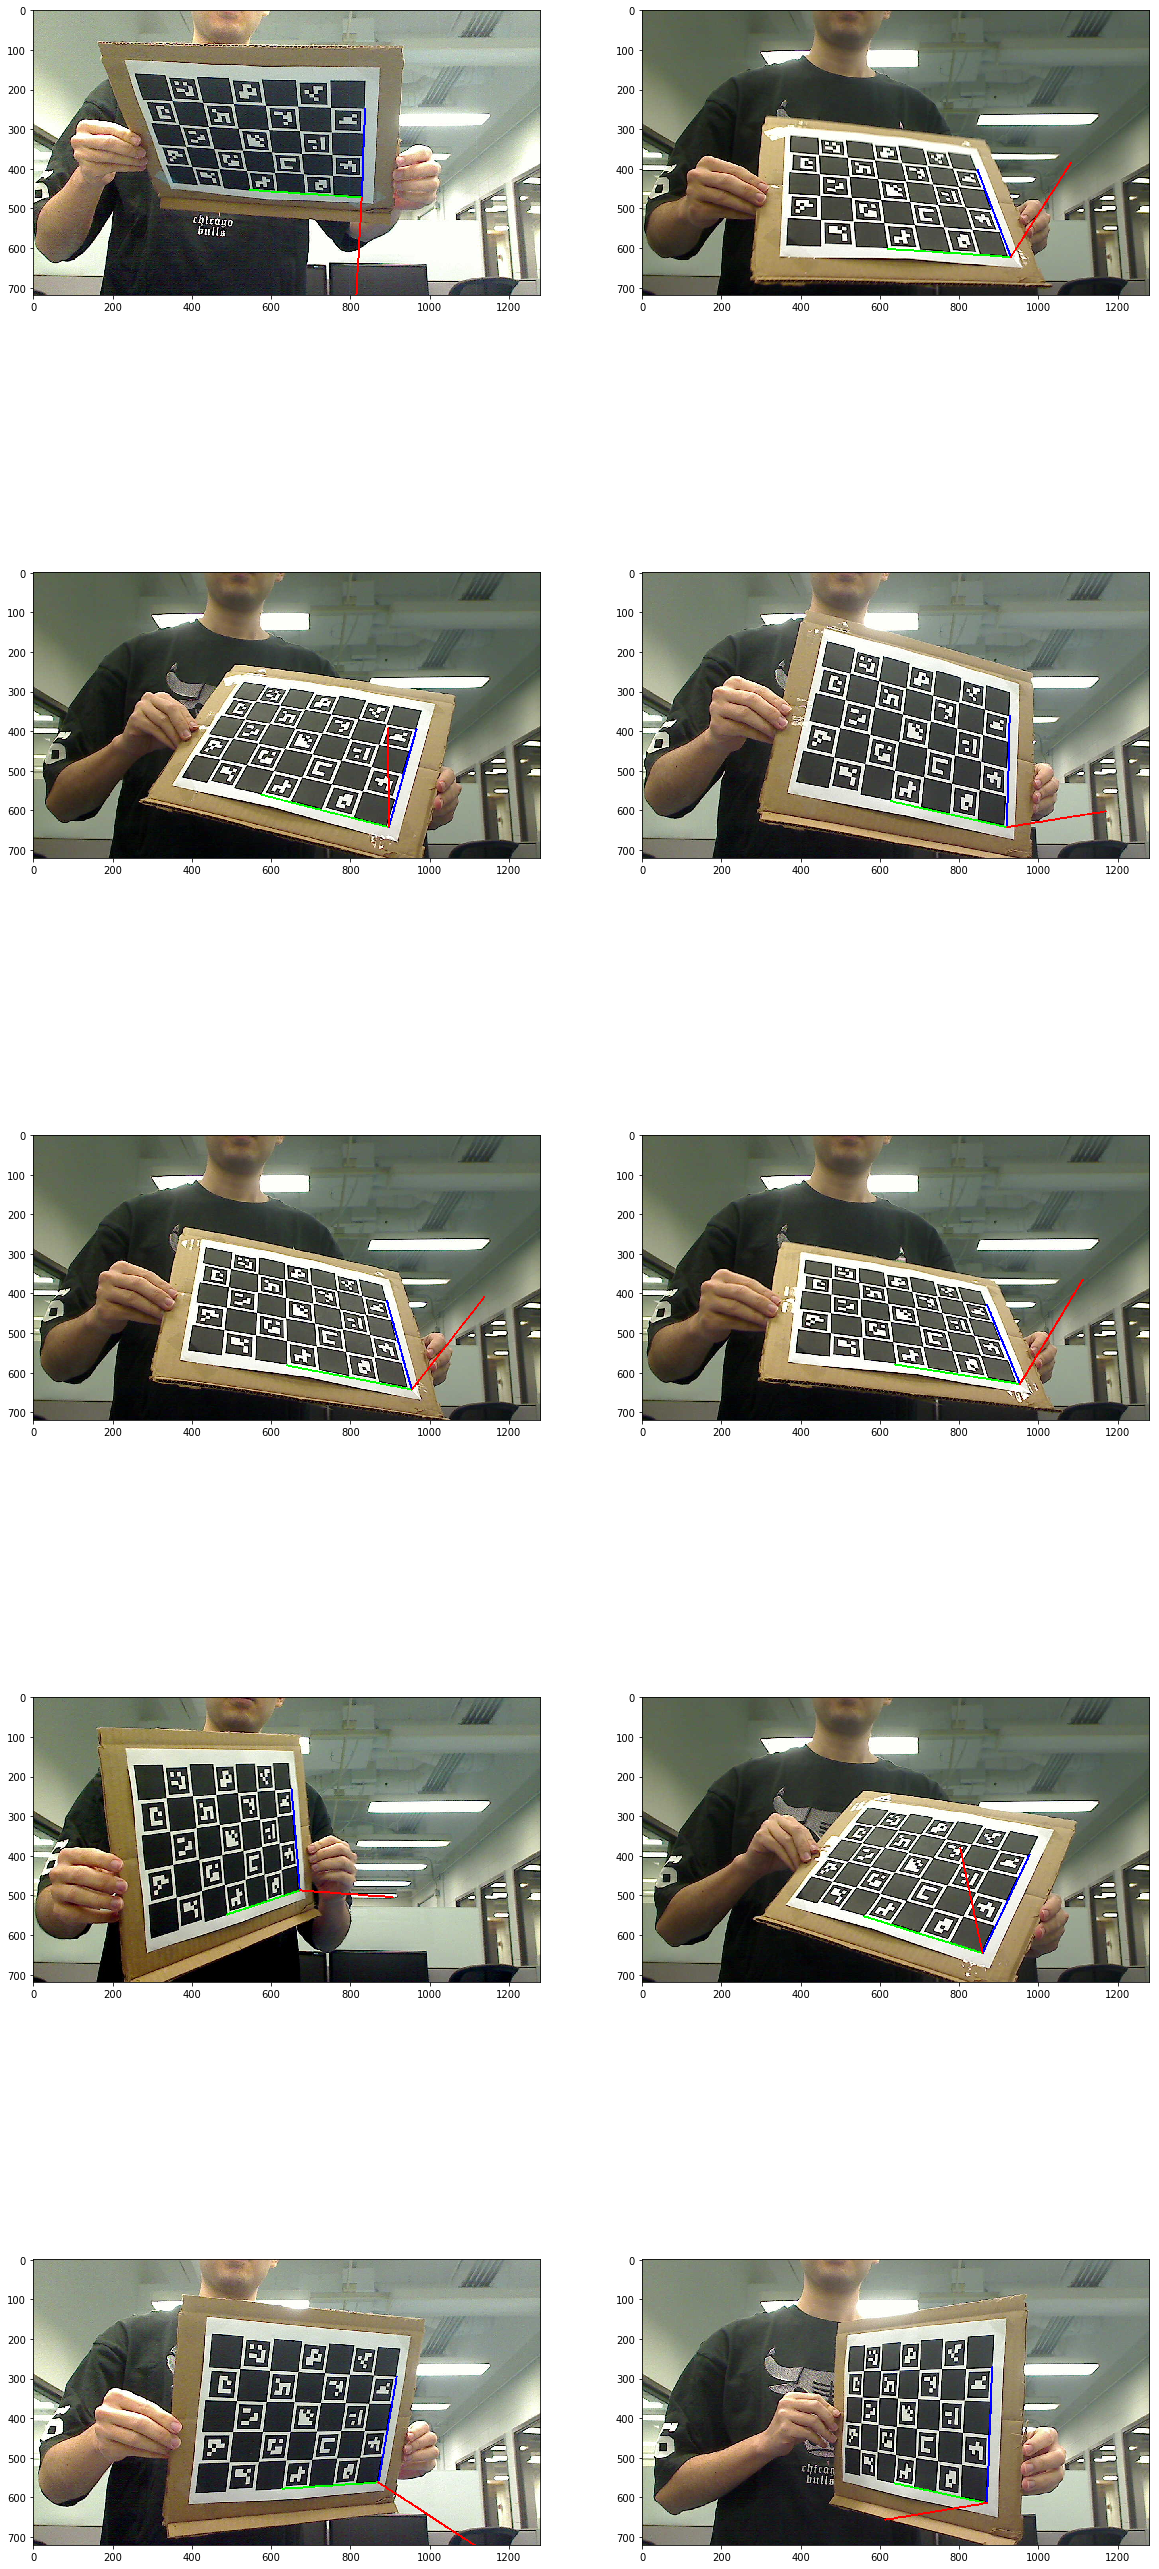

In [28]:
inds = np.random.randint(100, size=10)

plt.figure(figsize=(20,50))

for i, ind in enumerate(inds):
    img = read_image(images[ind])
    a,b,c = aruco.detectMarkers(img, calib_board.dictionary)
    img = aruco.drawAxis(img, cam_cal_data['cameraMatrix'], cam_cal_data['distCoeffs'],
              cam_cal_data['rotationVector'][ind], cam_cal_data['translationVector'][ind], 5*cal_mlen)
    
    plt.subplot(5,2,i+1)
    plt.imshow(img)
plt.show()

In [23]:
cam_cal_data

{'cameraMatrix': array([[1.27831893e+03, 0.00000000e+00, 5.97628286e+02],
        [0.00000000e+00, 1.27172102e+03, 3.39798230e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 'distCoeffs': array([[ 1.58937438e-01, -2.99387919e+00, -5.15528449e-03,
         -1.48101613e-02,  2.66031340e+01]]),
 'reprojectionError': 0.12615801638465995,
 'rms': 0.6645462109743833,
 'rotationVector': [array([[-2.15233891],
         [ 2.11692356],
         [ 0.05471996]]), array([[-2.16202581],
         [ 2.07393558],
         [ 0.09811951]]), array([[-2.1471674 ],
         [ 2.07508148],
         [ 0.08273286]]), array([[-2.05992411],
         [ 2.01750098],
         [-0.17913716]]), array([[-1.90329469],
         [ 1.94082649],
         [-0.38506445]]), array([[-1.73426642],
         [ 1.92142294],
         [-0.60928819]]), array([[-1.59730776],
         [ 1.79731054],
         [-0.75172405]]), array([[-1.54261447],
         [ 1.74483577],
         [-0.78651389]]), array([[-1.61581781],